In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

In [7]:
df_scored_w_raw_sales = pd.read_csv('data/df_scored_w_raw_sales.csv', encoding='euc-kr')
df_scored_w_raw_sales.shape

(8230, 30)

In [8]:
df_scored_w_raw_sales.head(2)

,customer_name,hp,customer_type,gender,birth_day,age_on_2023,show_room,series,model,model_category,...,nps_score,nps_category,log_nc_sales,log_service_sales,log_tot_sales,cluster_label,loyalty_score,raw_nc_sales,raw_service_sales,raw_tot_sales
0,원종영,010-8837-4492,개인,male,1976-12-22,48,천안,5SERIES,520d xDrive,520d,...,9.0,3.promoter,17.883261,0.000000,17.883261,0,24.506772,58425386,-,58425386
1,김수미,010-9063-7762,개인,female,1993-09-20,31,천안,3SERIES,3GT 20d xDrive LCI,3GT,...,10.0,3.promoter,17.580255,12.868132,17.582050,3,17.212445,43152659,77551,43230210


In [11]:
df_expert = df_scored_w_raw_sales[df_scored_w_raw_sales['loyalty_score'] >= 60] 
df_core = df_scored_w_raw_sales[(df_scored_w_raw_sales['loyalty_score'] >= 30) & (df_scored_w_raw_sales['loyalty_score'] < 60)] 
df_beginner = df_scored_w_raw_sales[df_scored_w_raw_sales['loyalty_score'] < 30] 

print(df_expert.shape)
print(df_core.shape)
print(df_beginner.shape)

(97, 30)
(2392, 30)
(5741, 30)


#### - expert, core, beginner 등급의 구성인원 및 구성비 = 97명(1.2%), 2392명(29.0%), 5741명(69.7%) 
---- 
### - 각 등급별 앞서 분류했던 Clusters의 구성비는 다음과 같다. 

2    51
1    46
Name: cluster_label, dtype: int64


<AxesSubplot:xlabel='cluster_label', ylabel='count'>

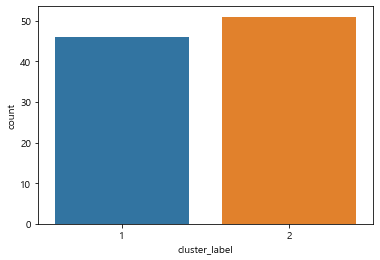

In [20]:
## expert 등급 
cnt = df_expert['cluster_label'].value_counts()
print(cnt)
sns.countplot(data=df_expert, x= 'cluster_label')

2    1035
1     969
0     198
3     190
Name: cluster_label, dtype: int64


<AxesSubplot:xlabel='cluster_label', ylabel='count'>

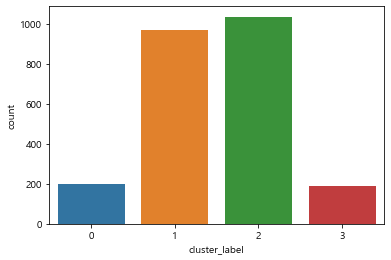

In [21]:
## core등급 
cnt = df_core['cluster_label'].value_counts()
print(cnt)
sns.countplot(data=df_core, x= 'cluster_label')

0    3002
3    2739
Name: cluster_label, dtype: int64


<AxesSubplot:xlabel='cluster_label', ylabel='count'>

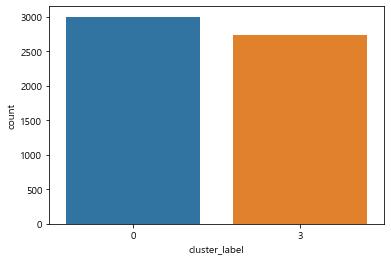

In [22]:
## beginner 등급 
cnt = df_beginner['cluster_label'].value_counts()
print(cnt)
sns.countplot(data=df_beginner, x= 'cluster_label')